# matplotlib API 入门

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Figure 和 Subplot

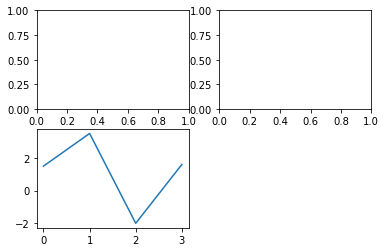

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot([1.5, 3.5, -2, 1.6])

In [4]:
from numpy.random import randn

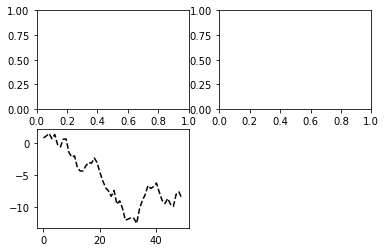

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(randn(50).cumsum(), 'k--')

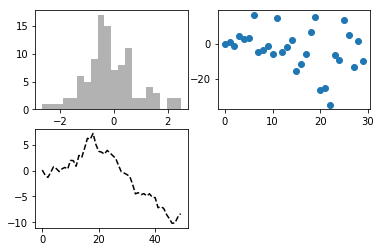

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) * randn(30))
plt.plot(randn(50).cumsum(), 'k--')

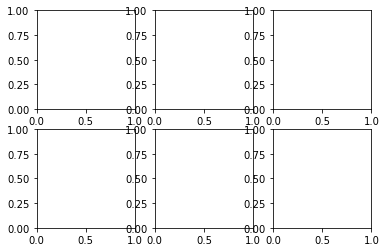

In [7]:
fig, axes = plt.subplots(2, 3)

In [8]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116e7b160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1175d96d8>]], dtype=object)

## 调整 subplot 周围的间距

    subplots_adjsut(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

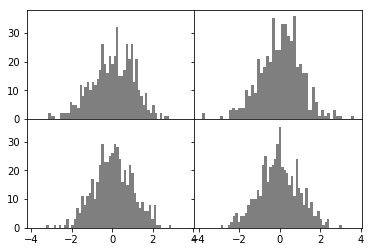

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色、标记和线型

    ax.plot(x, y, 'g--')

    ax.plot(x, y, linestyle='--', color='g')

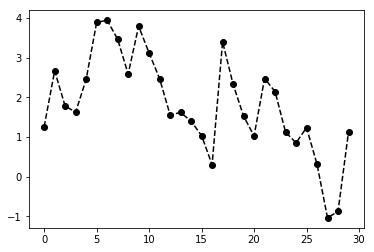

In [10]:
plt.plot(randn(30).cumsum(), 'ko--')

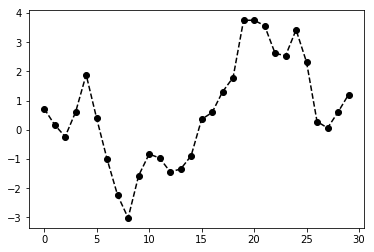

In [11]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

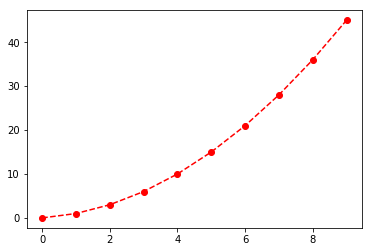

In [12]:
import numpy as np
plt.plot(np.arange(10).cumsum(), color='r', linestyle='dashed', marker='o')

In [13]:
data = randn(30).cumsum()

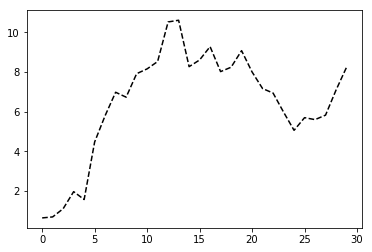

In [14]:
plt.plot(data, 'k--', label='Default')

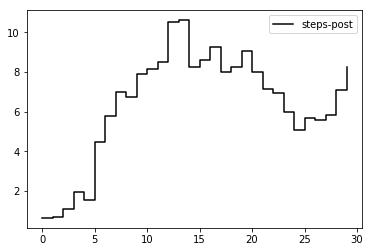

In [15]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 刻度、标签和图例

### 设置标题、轴标签以及刻度标签

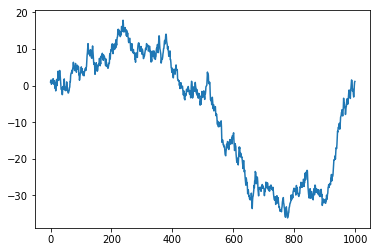

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

In [17]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [18]:
ax.set_title('My first matplotlib plot')

In [19]:
ax.set_xlabel('Stages')

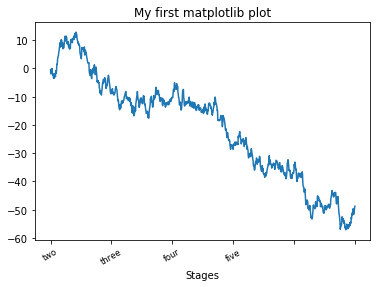

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
#ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### 添加图例

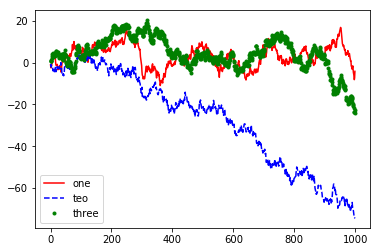

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'r', label='one')
ax.plot(randn(1000).cumsum(), 'b--', label='teo')
ax.plot(randn(1000).cumsum(), 'g.', label='three')
ax.legend(loc='best')

In [22]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

## 注解以及在 Subplot 上绘图

    ax.text(x, y, 'Hello world!',
            family='monospac', fontsize=10)

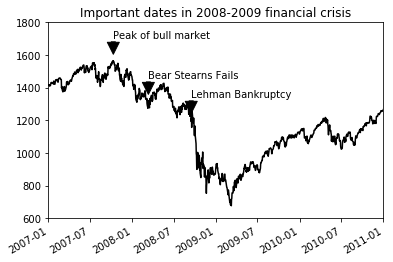

In [37]:
import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('/Users/wonderful/Desktop/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext = (date, spx.asof(date) + 200),
                arrowprops = dict(facecolor='black'),
                horizontalalignment='left',
                verticalalignment='top')
    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

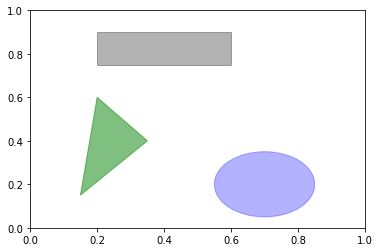

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 将图标保存到文件

In [41]:
plt.savefig('figpath.svg')

In [42]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [44]:
from io import StringIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

## matplotlib 配置

In [47]:
plt.rc('figure', figsize=(10, 10))

In [49]:
font_options = {'family': 'monospace',
                'weight': 'bold',
                #'size': 'small'
               }
plt.rc('font', **font_options)